In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img=cv2.imread('lion.jpg')


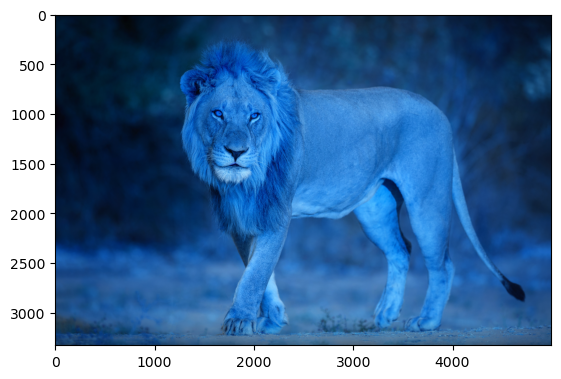

In [3]:
plt.imshow(img)

In [4]:
plt.show()

In [5]:
img.shape

(3329, 4994, 3)

In [6]:
lion_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

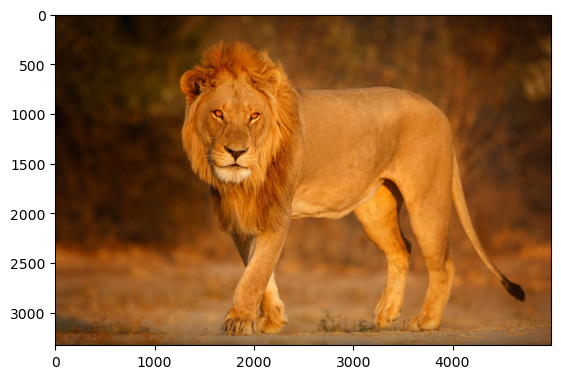

In [7]:
plt.imshow(lion_rgb)

In [8]:
gray = cv2.cvtColor(lion_rgb, cv2.COLOR_BGR2GRAY)

In [9]:
sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)  
sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)  

In [10]:
sobel_x.shape

(3329, 4994)

In [11]:
type(sobel_x)

numpy.ndarray

In [12]:
sobel_x.max()

650.0

In [13]:
gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

In [14]:
print(gradient_magnitude)

[[ 0.          8.          2.         ...  2.          0.
   0.        ]
 [ 2.          7.61577311  7.61577311 ...  5.83095189  8.48528137
  12.        ]
 [ 2.          8.48528137 12.80624847 ...  7.61577311  9.05538514
   4.        ]
 ...
 [ 8.         12.80624847  8.60232527 ...  5.83095189  9.05538514
   2.        ]
 [ 2.          9.05538514  5.09901951 ... 16.1245155  12.08304597
   8.        ]
 [ 0.          8.          4.         ...  8.          2.
   0.        ]]


In [15]:
gradient_magnitude.shape

(3329, 4994)

In [16]:
gradient_magnitude.max()

838.0417650690209

In [17]:
gradient_magnitude.min()

0.0

In [18]:
sobel_x_display = cv2.normalize(np.abs(sobel_x), None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
sobel_y_display = cv2.normalize(np.abs(sobel_y), None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
gradient_magnitude_display = cv2.normalize(gradient_magnitude, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

In [19]:
print(sobel_x_display.max())
print(sobel_x_display.min())
print(sobel_x_display.shape)

254
0
(3329, 4994)


In [20]:
print(gradient_magnitude_display.max())
print(gradient_magnitude_display.min())
print(gradient_magnitude_display.shape)

254
0
(3329, 4994)


(-0.5, 4993.5, 3328.5, -0.5)

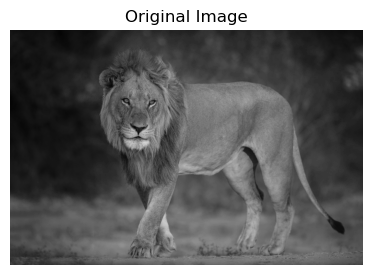

In [21]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.title("Original Image")
plt.imshow(gray, cmap='gray')
plt.axis('off')


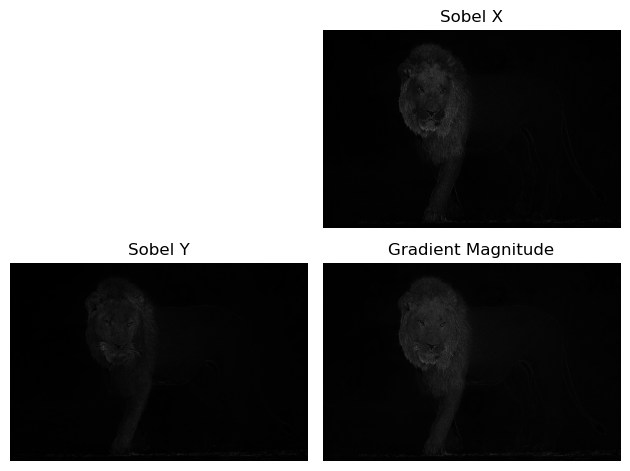

In [22]:


plt.subplot(2, 2, 2)
plt.title("Sobel X")
plt.imshow(sobel_x_display, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title("Sobel Y")
plt.imshow(sobel_y_display, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title("Gradient Magnitude")
plt.imshow(gradient_magnitude_display, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

In [23]:
dogimg=cv2.imread('dog.jpg')

In [24]:
graydog = cv2.cvtColor(dogimg, cv2.COLOR_BGR2GRAY)

In [25]:
sobel_x = cv2.Sobel(graydog, cv2.CV_64F, 1, 0, ksize=3)  
sobel_y = cv2.Sobel(graydog, cv2.CV_64F, 0, 1, ksize=3)  
gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

In [26]:
sobel_x_display = cv2.normalize(np.abs(sobel_x), None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
sobel_y_display = cv2.normalize(np.abs(sobel_y), None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
gradient_magnitude_display = cv2.normalize(gradient_magnitude, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

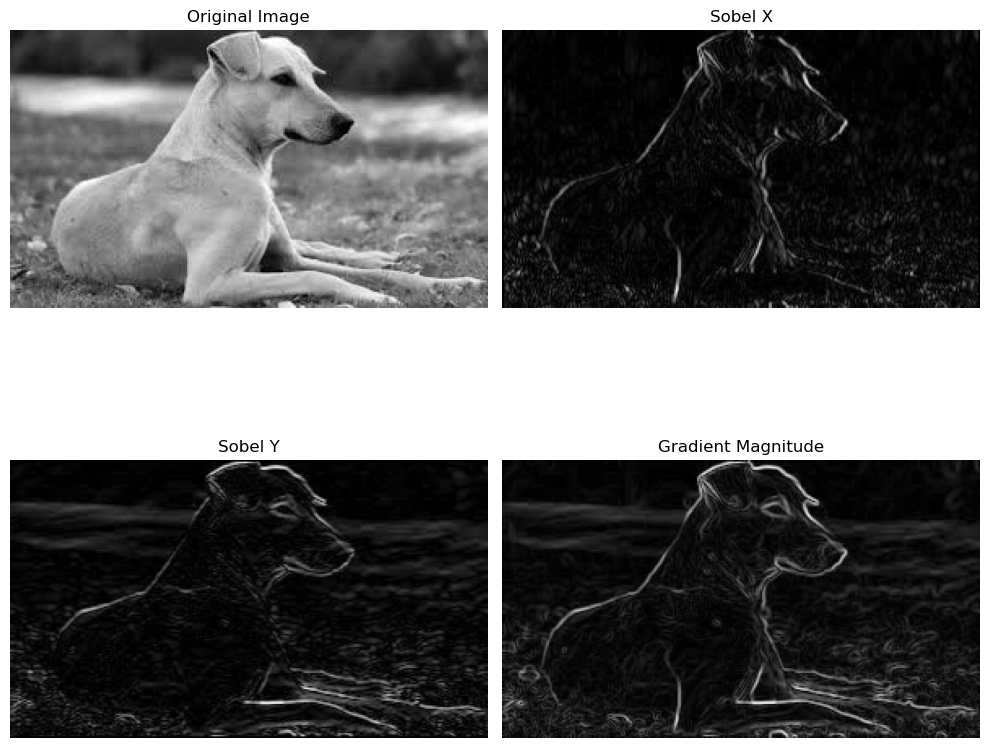

In [27]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.title("Original Image")
plt.imshow(graydog, cmap='gray')
plt.axis('off')




plt.subplot(2, 2, 2)
plt.title("Sobel X")
plt.imshow(sobel_x_display, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title("Sobel Y")
plt.imshow(sobel_y_display, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title("Gradient Magnitude")
plt.imshow(gradient_magnitude_display, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

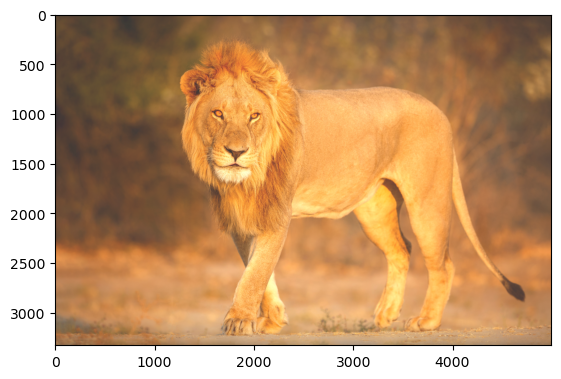

In [32]:

brightness_factor = 50 
bright_image = cv2.convertScaleAbs(lion_rgb, alpha=1, beta=brightness_factor)
plt.imshow(bright_image, cmap='gray')



In [36]:
# Apply Box Filter
box_filter = cv2.blur(lion_rgb, (5, 5)) 

In [37]:
# Apply Gaussian Filter
gaussian_filter = cv2.GaussianBlur(lion_rgb, (5, 5), 0) 


In [38]:

# Apply Median Filter
median_filter = cv2.medianBlur(lion_rgb, 5)  # Kernel size 5

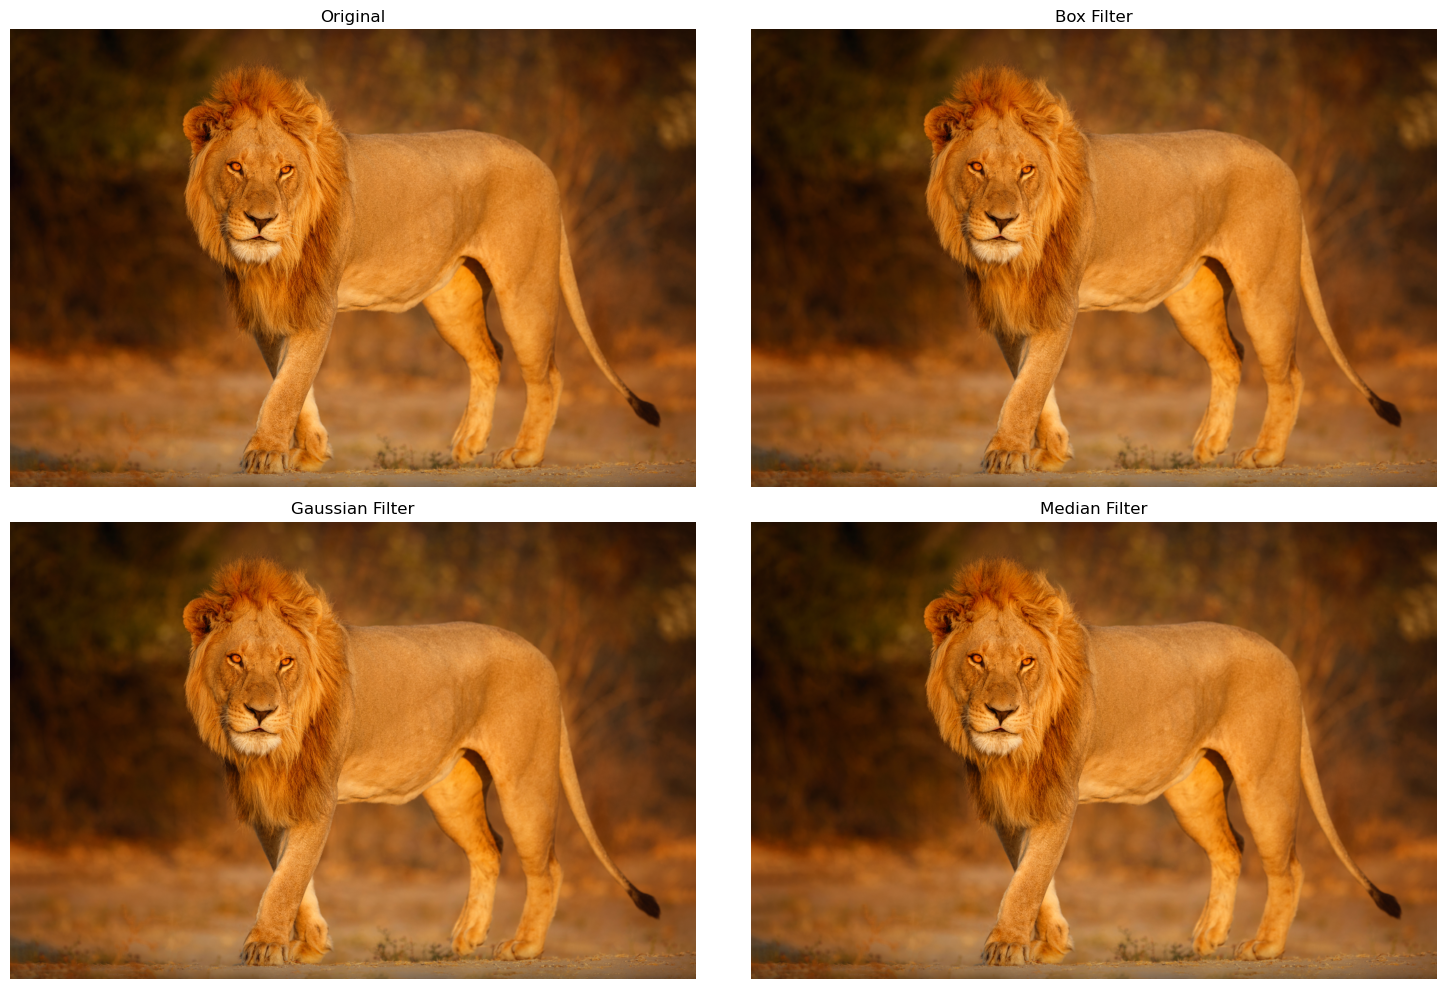

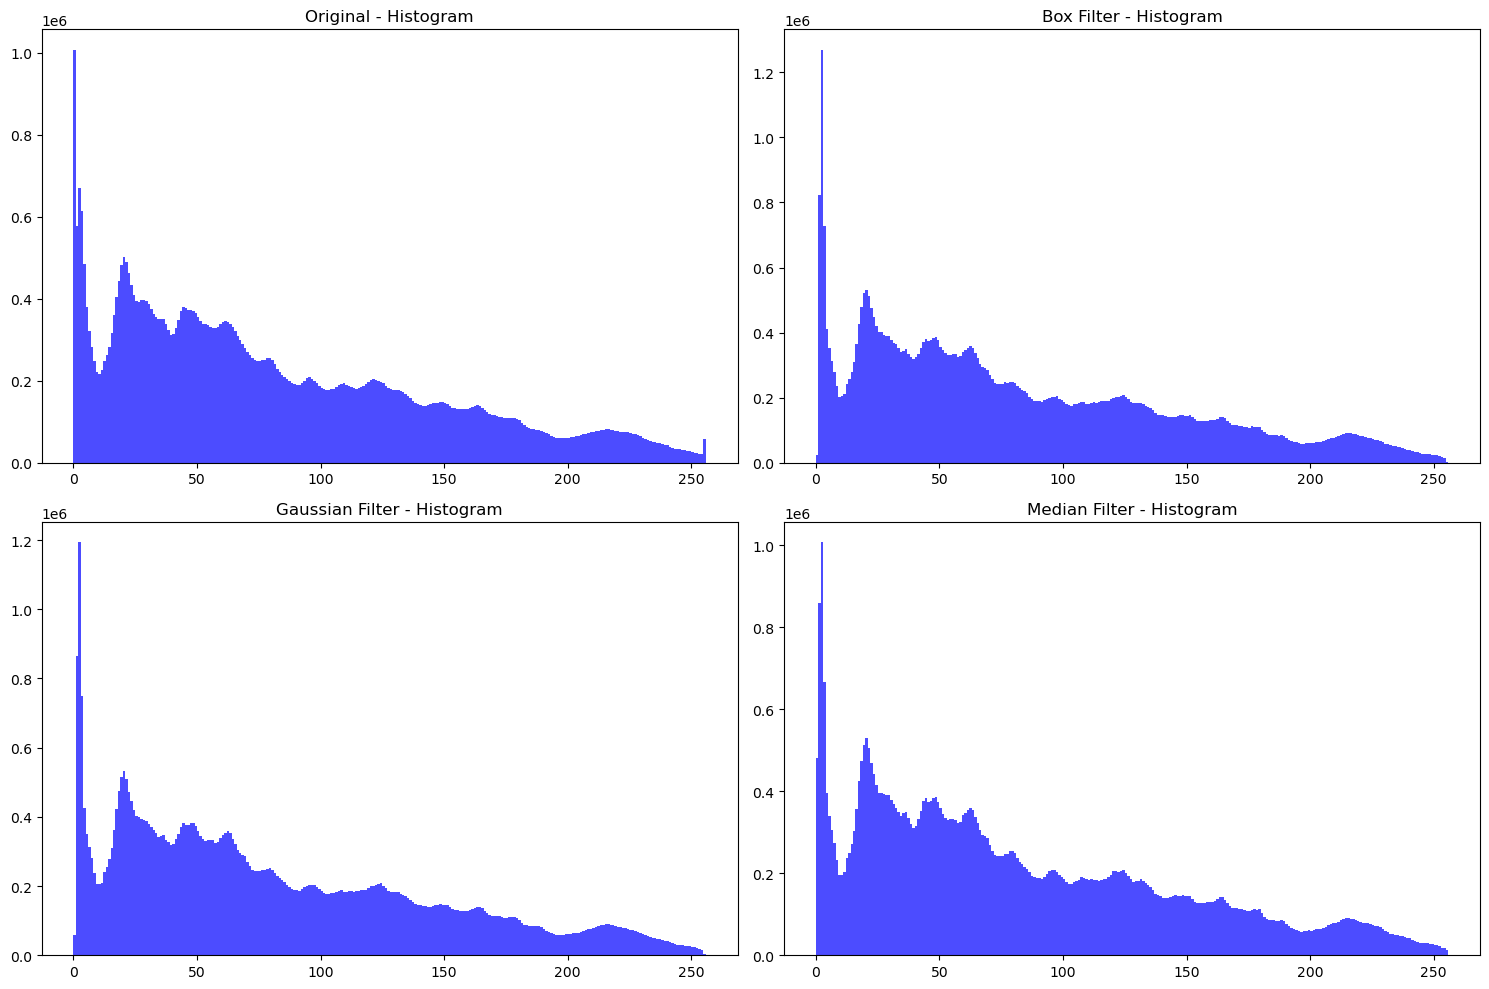

In [42]:
titles = ["Original", "Box Filter", "Gaussian Filter", "Median Filter"]
images = [lion_rgb, box_filter, gaussian_filter, median_filter]

plt.figure(figsize=(15, 10))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(images[i], cmap="gray")
    plt.title(titles[i])
    plt.axis("off")

plt.tight_layout()
plt.show()

# Plot Histograms for Comparison
plt.figure(figsize=(15, 10))
for i, img in enumerate(images):
    plt.subplot(2, 2, i + 1)
    plt.hist(img.ravel(), bins=256, range=(0, 256), color="blue", alpha=0.7)
    plt.title(titles[i] + " - Histogram")

plt.tight_layout()
plt.show()

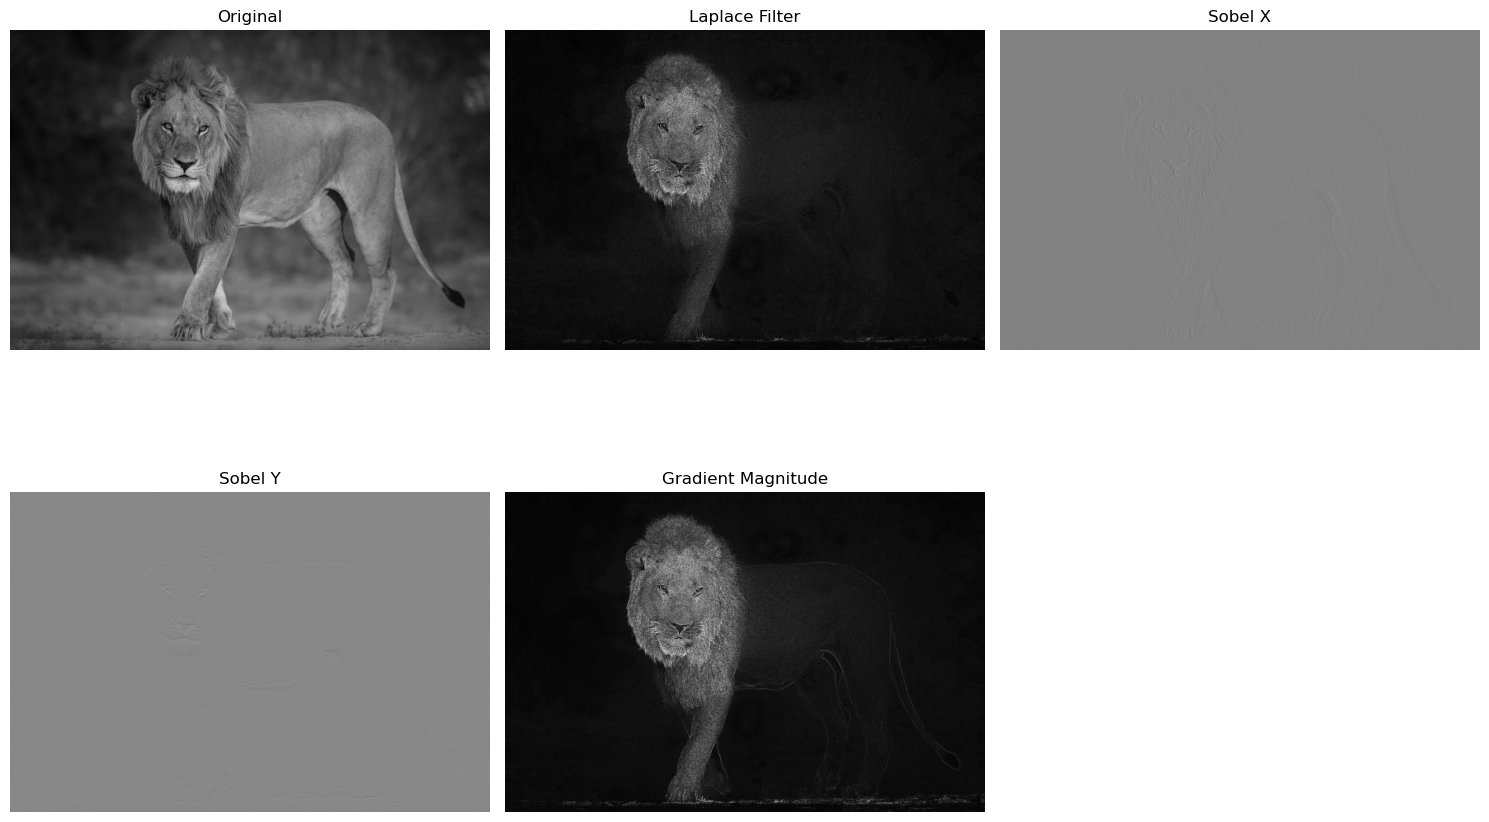

In [48]:
# Laplace Filter
laplace = cv2.Laplacian(gray, cv2.CV_64F, ksize=3)  # Apply Laplace filter
laplace = cv2.convertScaleAbs(laplace)  # Convert back to 8-bit format

# Gradient: Sobel Filter
sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)  # Gradient in X direction
sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)  # Gradient in Y direction

# Compute Gradient Magnitude
gradient_magnitude = cv2.magnitude(sobel_x, sobel_y)  # Magnitude of gradients
gradient_magnitude = cv2.convertScaleAbs(gradient_magnitude)

# Plot Original and Filtered Images
titles = ["Original", "Laplace Filter", "Sobel X", "Sobel Y", "Gradient Magnitude"]
images = [gray, laplace, sobel_x, sobel_y, gradient_magnitude]

plt.figure(figsize=(15, 10))
for i in range(5):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i], cmap="gray")
    plt.title(titles[i])
    plt.axis("off")

plt.tight_layout()
plt.show()

In [55]:
eagleimg=cv2.imread('eagle.jpg')
grayeagle = cv2.cvtColor(eagleimg, cv2.COLOR_BGR2GRAY)

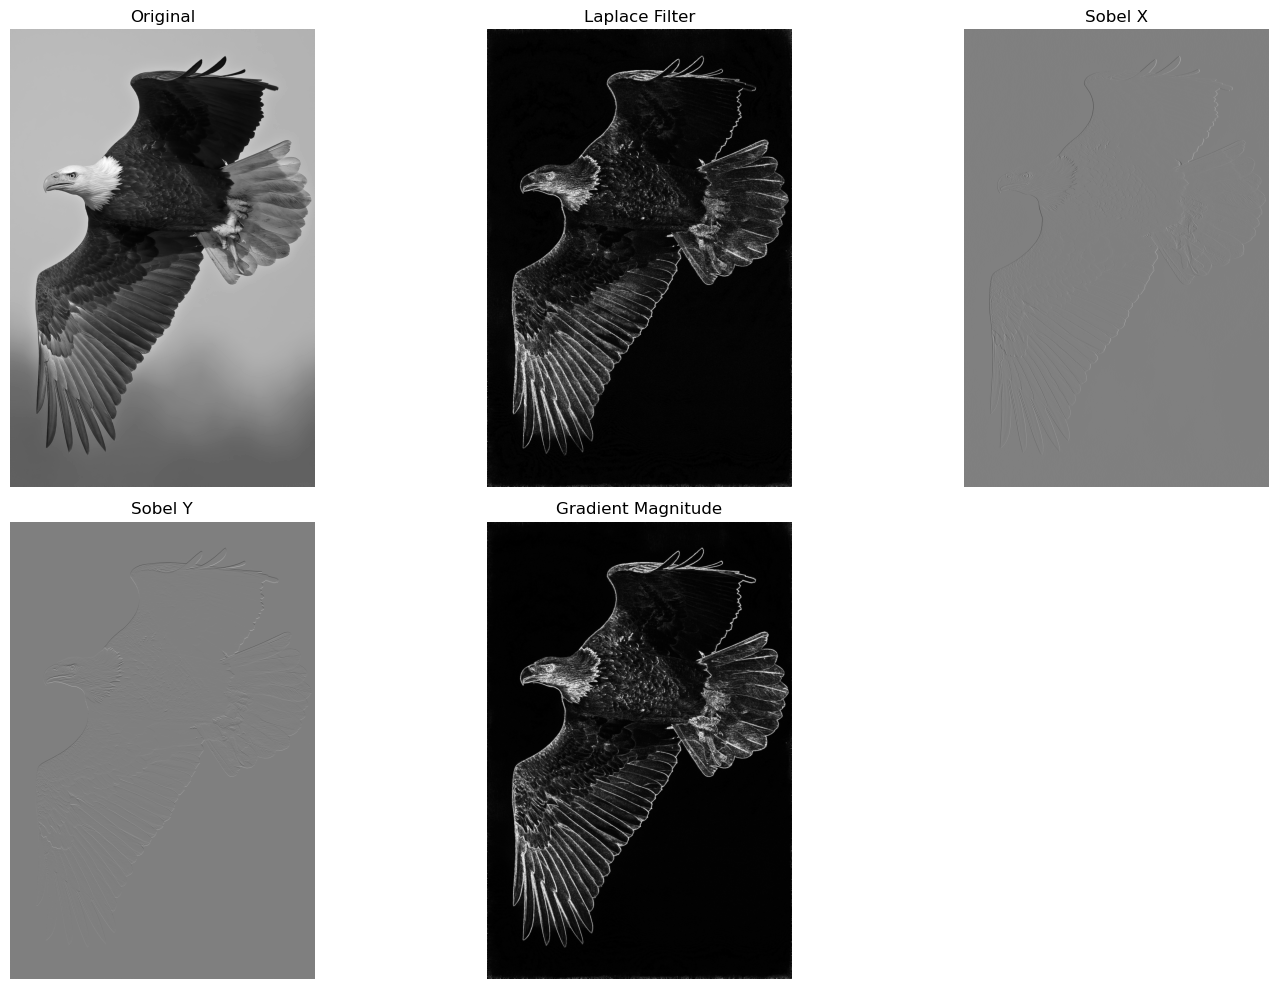

In [56]:
# Laplace Filter
laplace = cv2.Laplacian(grayeagle, cv2.CV_64F, ksize=3)  # Apply Laplace filter
laplace = cv2.convertScaleAbs(laplace)  # Convert back to 8-bit format

# Gradient: Sobel Filter
sobel_x = cv2.Sobel(grayeagle, cv2.CV_64F, 1, 0, ksize=3)  # Gradient in X direction
sobel_y = cv2.Sobel(grayeagle, cv2.CV_64F, 0, 1, ksize=3)  # Gradient in Y direction

# Compute Gradient Magnitude
gradient_magnitude = cv2.magnitude(sobel_x, sobel_y)  # Magnitude of gradients
gradient_magnitude = cv2.convertScaleAbs(gradient_magnitude)

# Plot Original and Filtered Images
titles = ["Original", "Laplace Filter", "Sobel X", "Sobel Y", "Gradient Magnitude"]
images = [grayeagle, laplace, sobel_x, sobel_y, gradient_magnitude]

plt.figure(figsize=(15, 10))
for i in range(5):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i], cmap="gray")
    plt.title(titles[i])
    plt.axis("off")

plt.tight_layout()
plt.show()